In [1]:
import torch
import numpy as np
np.set_printoptions(precision=3)

a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)

tensor_a = torch.tensor(a)
tensor_b = torch.from_numpy(b)

print("tensor_a:", tensor_a)
print("tensor_b:", tensor_b)

tensor_a: tensor([1, 2, 3])
tensor_b: tensor([4, 5, 6], dtype=torch.int32)


In [2]:
t_ones = torch.ones((2, 3))
print("tensor_ones:", t_ones)

tensor_ones: tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [3]:
t_rand = torch.rand(2,3)
print(t_rand)

tensor([[0.1648, 0.2581, 0.7047],
        [0.6927, 0.8871, 0.2346]])


In [4]:
t_a_new = tensor_a.to(torch.int64)
print(t_a_new.type)

<built-in method type of Tensor object at 0x111e55450>


Transpose, reshape, squeeze

In [ ]:
t = torch.rand(3,5)
t_tr = torch.transpose(t, 0, 1)

print(f'{t.shape} - {t_tr.shape}')

torch.Size([3, 5]) - torch.Size([5, 3])


`.reshape` rearranges points into new shape (can be a 2d matix, 3d volumn, multi-dimensional tensor)

In [12]:
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
print(f'{t.shape} -> {t_reshape.shape}')

t = torch.zeros(6,5)
t_reshape = t.reshape(5,6)
print(f'{t.shape} -> {t_reshape.shape}')

t = torch.zeros(125)
t_reshape = t.reshape(5,5,5)
print(f'{t.shape} -> {t_reshape.shape}')

torch.Size([30]) -> torch.Size([5, 6])
torch.Size([6, 5]) -> torch.Size([5, 6])
torch.Size([125]) -> torch.Size([5, 5, 5])


`squeeze` removes dimension of size 1 at a particular index or all indices.

In [23]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t, 2) # removes dimensions of size 1 at index 2
print(f'{t.shape} -> {t_sqz.shape}')


t = torch.zeros(1, 3, 1, 5)  # Tensor with shape (1, 3, 1, 5)
t_sqz = torch.squeeze(t)  # Removes dimensions of size 1

print(f'{t.shape} -> {t_sqz.shape}')

t = torch.zeros(4,1)
print(t)
t_sqz = torch.squeeze(t)
print(t_sqz)

torch.Size([1, 2, 1, 4, 1]) -> torch.Size([1, 2, 4, 1])
torch.Size([1, 3, 1, 5]) -> torch.Size([3, 5])
tensor([[0.],
        [0.],
        [0.],
        [0.]])
tensor([0., 0., 0., 0.])


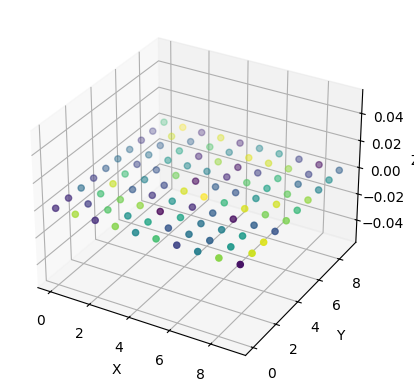

In [33]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

tensor_3d = torch.rand((10, 10, 1))

# Plot the 3D tensor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the coordinates and values
x, y, z = tensor_3d.nonzero(as_tuple=True)
values = tensor_3d[x, y, z]

# Plot the points
ax.scatter(x.numpy(), y.numpy(), z.numpy(), c=values.numpy(), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

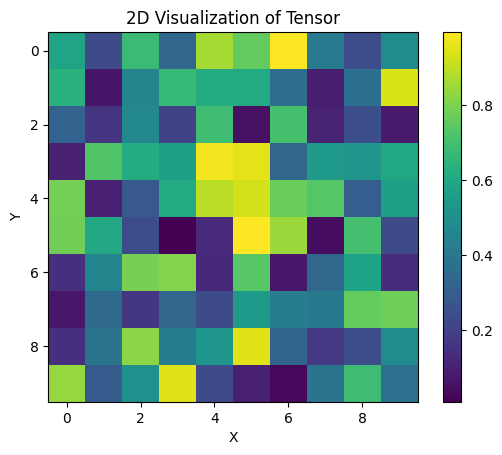

In [35]:
tensor_2d = torch.rand((10, 10))  # Create a 2D tensor

plt.imshow(tensor_2d.numpy(), cmap='viridis', interpolation='none')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Visualization of Tensor')
plt.show()


Mathematical operations

In [37]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean=0, std=1, size=(5,2))

t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t1)
print(t2)
print(t5)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


`chunk` divides tensor into equally sized tensors.

In [40]:
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
print(t_splits)

t_splits = torch.split(t, [2,4])
print(t_splits)

tensor([0.8750, 0.5059, 0.2366, 0.7570, 0.2346, 0.6471])
(tensor([0.8750, 0.5059]), tensor([0.2366, 0.7570]), tensor([0.2346, 0.6471]))
(tensor([0.8750, 0.5059]), tensor([0.2366, 0.7570, 0.2346, 0.6471]))


Concatenate

In [41]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [48]:
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], dim=1)
D = torch.stack([A, B], dim=0)
print(A)
print(B)
print(C)
print(D)

tensor([1., 1., 1.])
tensor([0., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 1., 1.],
        [0., 0., 0.]])


DataLoader

In [49]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [50]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


Create batch

In [57]:
data_loader = DataLoader(t, batch_size=2, drop_last=False)
for i, batch in enumerate(data_loader):
    print(f'batch {i}: {batch}')

batch 0: tensor([0., 1.])
batch 1: tensor([2., 3.])
batch 2: tensor([4., 5.])


Custom dataset

In [72]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

x = torch.randint(0, 10, (10, 2))
y = torch.randint(0, 10, (10, 2))

# Create an instance of the custom dataset
custom_dataset = CustomDataset(x, y)

# Example usage
for i in range(len(custom_dataset)):
    print(custom_dataset[i])

(tensor([2, 9]), tensor([1, 0]))
(tensor([1, 2]), tensor([8, 1]))
(tensor([6, 1]), tensor([8, 1]))
(tensor([9, 8]), tensor([2, 6]))
(tensor([9, 7]), tensor([6, 1]))
(tensor([7, 2]), tensor([1, 7]))
(tensor([0, 7]), tensor([5, 3]))
(tensor([5, 8]), tensor([4, 4]))
(tensor([5, 8]), tensor([9, 5]))
(tensor([5, 8]), tensor([1, 0]))


Shuffle

In [75]:
data_loader = DataLoader(dataset=custom_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'Batch {i}')
    print('x:', batch[0])
    print('y:', batch[1])

Batch 1
x: tensor([[2, 9],
        [7, 2]])
y: tensor([[1, 0],
        [1, 7]])
Batch 2
x: tensor([[9, 8],
        [0, 7]])
y: tensor([[2, 6],
        [5, 3]])
Batch 3
x: tensor([[5, 8],
        [9, 7]])
y: tensor([[1, 0],
        [6, 1]])
Batch 4
x: tensor([[6, 1],
        [5, 8]])
y: tensor([[8, 1],
        [4, 4]])
Batch 5
x: tensor([[1, 2],
        [5, 8]])
y: tensor([[8, 1],
        [9, 5]])


Train linear regression model

tensor([[0.0000],
        [0.1010],
        [0.2020],
        [0.3030],
        [0.4040]])
tensor([[ 3.5056],
        [ 3.9633],
        [ 0.1436],
        [ 2.9866],
        [-0.9155]])


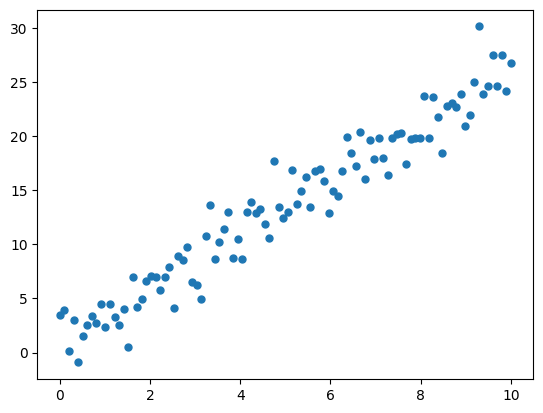

In [162]:
# Generate random X values
X = torch.linspace(0, 10, 100).reshape(-1, 1)

# Define the true slope and intercept
true_slope = 2.5
true_intercept = 1.0

# Generate y values with some noise
y = true_slope * X + true_intercept + torch.randn(X.size()) * 2

print(X[:5])  # Print first 5 values of X
print(y[:5])  # Print first 5 values of y

plt.plot(X, y, 'o', markersize=5)
plt.show()

In [163]:
def model (xb, weight, bias):
    return xb * weight + bias

In [164]:
def loss_fn(pred, target):
    return (pred - target).pow(2).mean()

In [181]:
learning_rate = 0.001
num_epochs = 100
log_epochs = 10

from torch.utils.data import TensorDataset

X_norm = (X - X.mean()) / X.std()

train_ds = TensorDataset(X, y)
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


# Initialize weights and bias
weight = torch.randn(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

print("Weights:", weight)
print("Bias:", bias)


losses = []

for epoch in range(num_epochs):
    for xb, yb in train_dl:
        # Generate predictions
        pred = model(xb, weight, bias)
        # Calculate loss
        loss = loss_fn(pred, yb)
        # Perform gradient descent
        loss.backward()
        losses.append(loss.item())
        
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

Weights: tensor([1.8022], requires_grad=True)
Bias: tensor([0.], requires_grad=True)


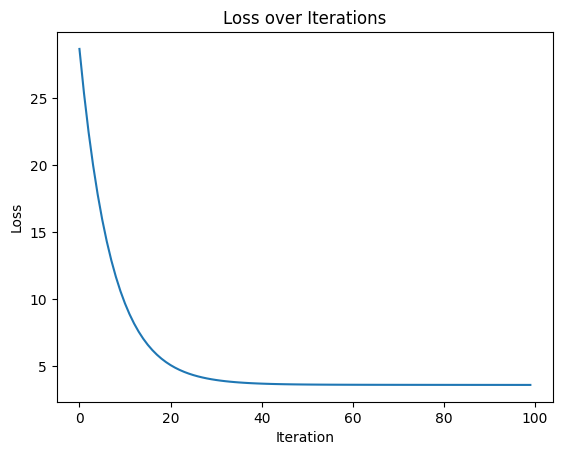

In [182]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

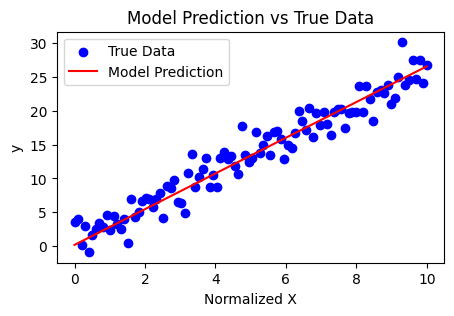

In [184]:
# Generate predictions using the trained model
with torch.no_grad():
    y_pred = model(X, weight, bias)

# Plot the true data and the model's predictions
plt.figure(figsize=(5, 3))
plt.scatter(X.numpy(), y.numpy(), label='True Data', color='blue')
plt.plot(X.numpy(), y_pred.numpy(), label='Model Prediction', color='red')
plt.xlabel('Normalized X')
plt.ylabel('y')
plt.title('Model Prediction vs True Data')
plt.legend()
plt.show()

`torch.nn` and `torch.optim` training

In [197]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [198]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([[-0.5172]], requires_grad=True)
Parameter containing:
tensor([-0.4746], requires_grad=True)


In [199]:
losses = []
for epoch in range(num_epochs):
    for xb, yb in train_dl:
        pred  = model(xb)[:, 0]
        loss = loss_fn(pred, yb)
        loss.backward()
        
        optimizer.step() # update weights and biases
        
        optimizer.zero_grad() # reset grads
        
        losses.append(loss.item())

/Users/hieu/miniconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


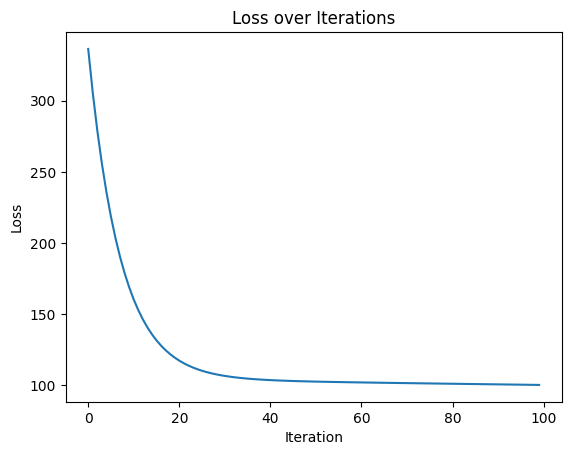

In [200]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

Iris

In [201]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [204]:
X = iris['data']
y = iris['target']

print(X.shape, y.shape)

(150, 4) (150,)


In [205]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (120, 4) (120,)
Testing set size: (30, 4) (30,)


In [206]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# Normalize X_train
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create DataLoader with batch size of 10
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Example usage
for batch_idx, (data, target) in enumerate(train_loader):
    print(f'Batch {batch_idx + 1}')
    print('Data:', data)
    print('Target:', target)

Batch 1
Data: tensor([[-0.0112, -0.8086,  0.7870,  0.9566],
        [-0.0112, -0.8086,  0.2139, -0.2447],
        [-0.4988,  1.8744, -1.3906, -1.0456],
        [ 0.3545, -1.0322,  1.0735,  0.2892],
        [ 0.5983, -0.5851,  0.7870,  0.4227],
        [ 1.6954,  0.3093,  1.3027,  0.8232],
        [ 1.0859,  0.0857,  0.3859,  0.2892],
        [ 0.2326, -1.9266,  0.7297,  0.4227],
        [-1.1082, -1.2558,  0.4432,  0.6897],
        [ 0.8421, -0.1379,  0.8443,  1.0901]])
Target: tensor([2, 1, 0, 2, 2, 2, 1, 2, 2, 2])
Batch 2
Data: tensor([[-0.9863,  0.9801, -1.2187, -0.7787],
        [-1.4739,  0.3093, -1.3333, -1.3126],
        [ 1.2078, -0.1379,  1.0162,  1.2236],
        [-1.3520,  0.3093, -1.3906, -1.3126],
        [-1.2301,  0.7565, -1.2187, -1.3126],
        [ 1.0859,  0.5329,  1.1308,  1.2236],
        [-0.1331, -0.1379,  0.2712,  0.0222],
        [-1.7177, -0.3615, -1.3333, -1.3126],
        [-0.1331, -1.2558,  0.7297,  1.0901],
        [-0.3769,  2.5452, -1.3333, -1.3126]])
Tar

In [209]:
import torch.nn as nn

class IrisModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First linear layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second linear layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # Apply Sigmoid activation after the first layer
        x = torch.softmax(self.fc2(x), dim=1)  # Apply Softmax activation at the output layer
        return x

# Define the input size, hidden size, and output size
input_size = X.shape[1]  # Number of features in the Iris dataset
hidden_size = 10  # Number of neurons in the hidden layer
output_size = len(torch.unique(torch.tensor(y)))  # Number of classes in the Iris dataset

# Instantiate the model
model = IrisModel(input_size, hidden_size, output_size)
print(model)

IrisModel(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)


In [212]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [218]:
for p in model.parameters():
    print(p.shape)

torch.Size([10, 4])
torch.Size([10])
torch.Size([3, 10])
torch.Size([3])


In [219]:
num_epochs = 100
loss_hist = []
acc_hist = []

for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    
    avg_loss = total_loss / len(train_loader)
    accuracy = correct / len(train_loader.dataset)
    
    loss_hist.append(avg_loss)
    acc_hist.append(accuracy)
    
    if (epoch + 1) % log_epochs == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 10/100, Loss: 1.0693, Accuracy: 0.6500
Epoch 20/100, Loss: 1.0039, Accuracy: 0.6583
Epoch 30/100, Loss: 0.9354, Accuracy: 0.6583
Epoch 40/100, Loss: 0.8856, Accuracy: 0.6583
Epoch 50/100, Loss: 0.8506, Accuracy: 0.7167
Epoch 60/100, Loss: 0.8230, Accuracy: 0.8083
Epoch 70/100, Loss: 0.8001, Accuracy: 0.8333
Epoch 80/100, Loss: 0.7806, Accuracy: 0.8667
Epoch 90/100, Loss: 0.7638, Accuracy: 0.8750
Epoch 100/100, Loss: 0.7493, Accuracy: 0.8833


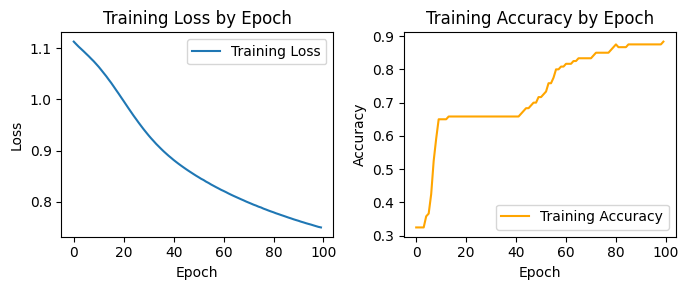

In [221]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Plot training loss
ax1.plot(loss_hist, label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Epoch')
ax1.legend()

# Plot training accuracy
ax2.plot(acc_hist, label='Training Accuracy', color='orange')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy by Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [222]:
# Normalize X_test using the same scaler used for X_train
X_test_normalized = scaler.transform(X_test)

# Convert to torch tensors
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_output = model(X_test_tensor)
    test_loss = loss_fn(test_output, y_test_tensor)
    test_pred = test_output.argmax(dim=1, keepdim=True)
    test_accuracy = test_pred.eq(y_test_tensor.view_as(test_pred)).sum().item() / len(y_test_tensor)

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7230
Test Accuracy: 0.9333


Save and reload model.

In [223]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [224]:
model_new = torch.load(path)

In [225]:
model_new.eval()

IrisModel(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)